In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [56]:
df=pd.read_csv("termdeposit_train.csv")


In [57]:
df.shape

(31647, 18)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [59]:
def seperate_variable(df,threshold):
    cat_variable=[]
    num_variable=[]
    for column in df.columns:
        if df[column].dtype=="object":
            cat_variable.append(column)
        elif df[column].nunique()>threshold:
            num_variable.append(column)
        else:
            cat_variable.append(column)
    return cat_variable,num_variable

            

In [60]:
cat_variable,num_variable=seperate_variable(df,10)

In [61]:
for column in cat_variable:
    val=df[column].value_counts()
    print(f"{column}={val}")

job=job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital=marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education=education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default=default
no     31062
yes      585
Name: count, dtype: int64
housing=housing
yes    17584
no     14063
Name: count, dtype: int64
loan=loan
no     26516
yes     5131
Name: count, dtype: int64
contact=contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64
month=month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64
poutc

In [62]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [63]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [64]:
df.drop(columns="ID",inplace=True)

In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

univariant anylysis

<Axes: ylabel='count'>

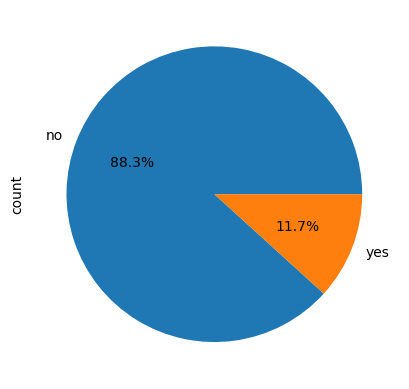

In [67]:
df["subscribed"].value_counts().plot(kind="pie",autopct='%1.1f%%')

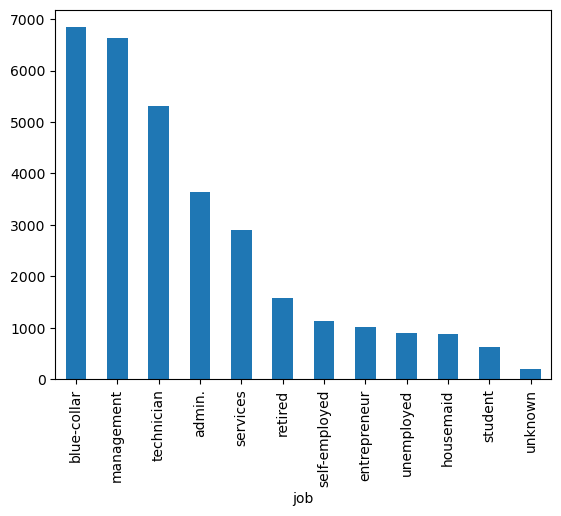

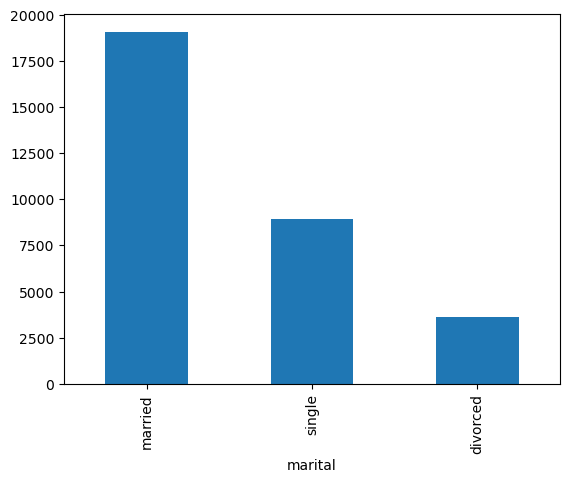

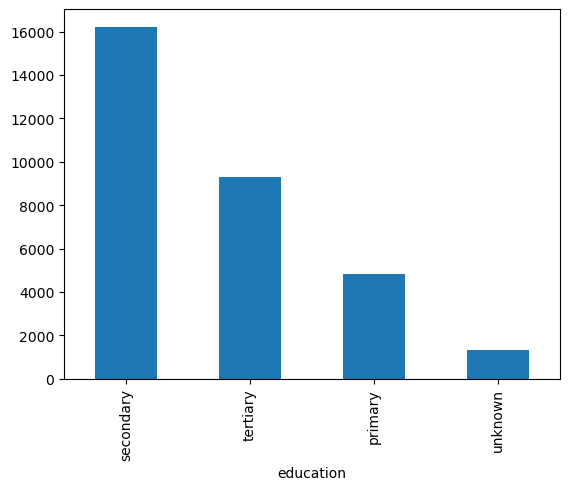

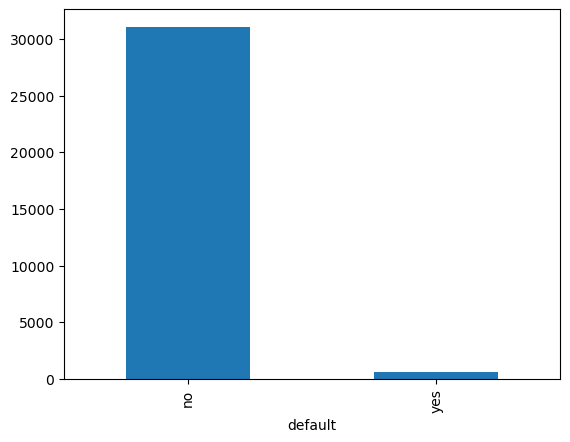

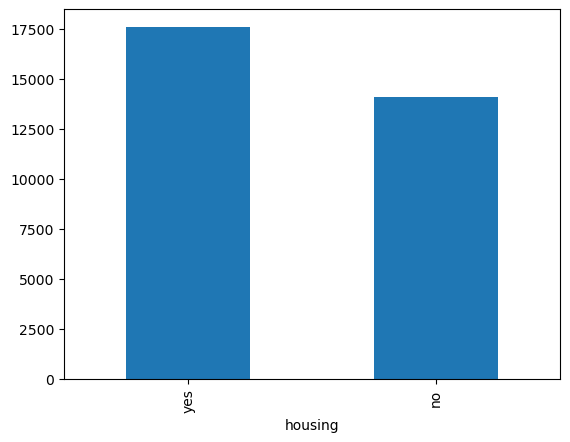

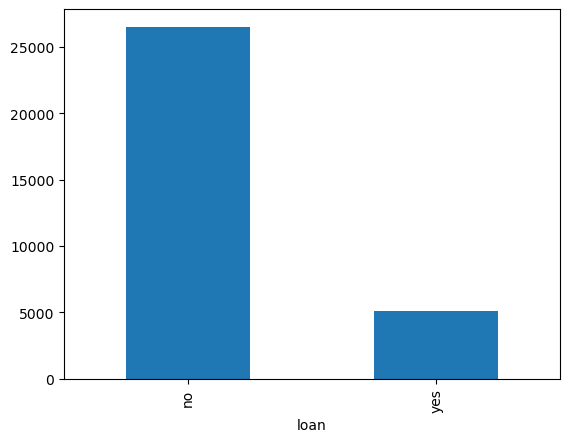

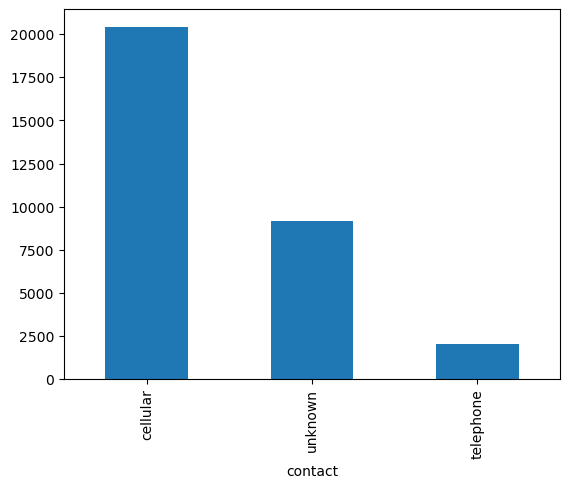

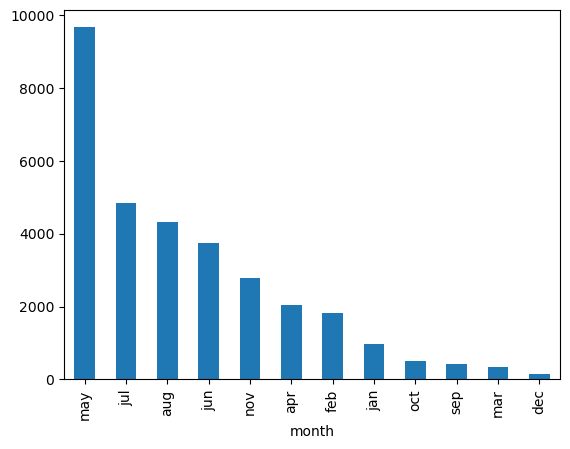

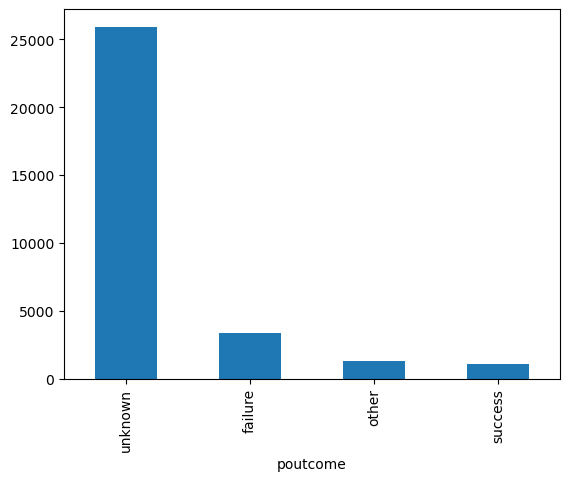

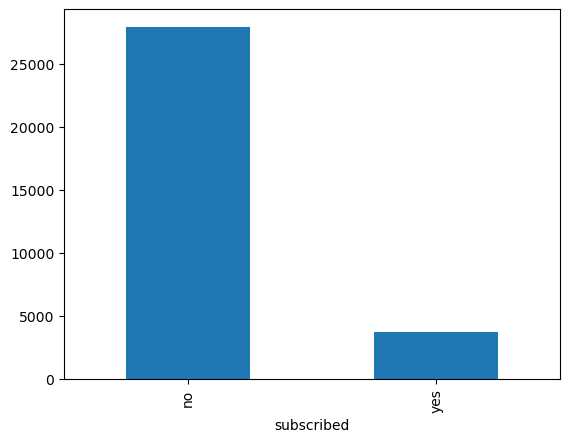

In [68]:
for column in cat_variable:
    df[column].value_counts().plot(kind='bar')
    plt.show()

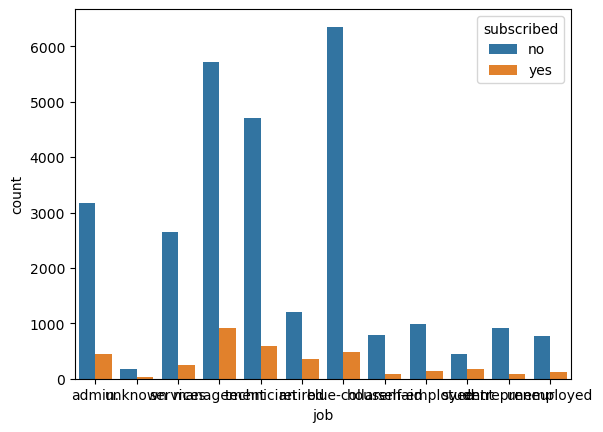

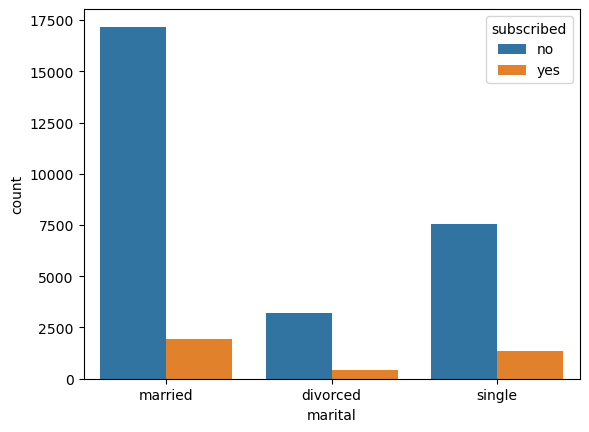

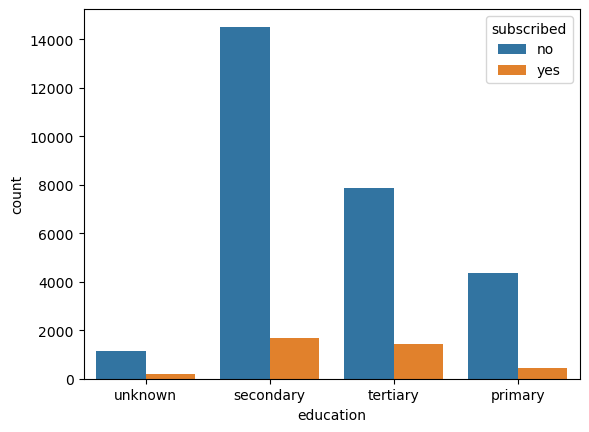

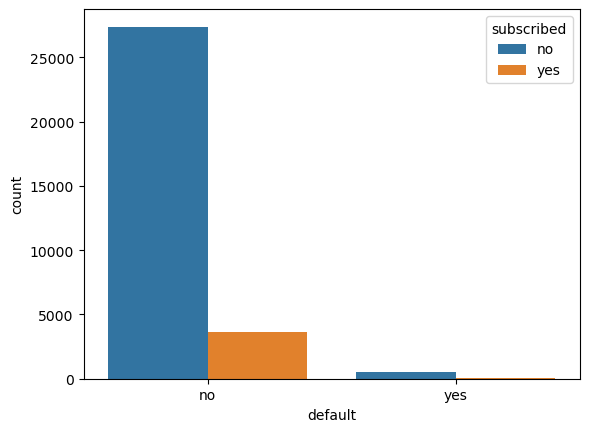

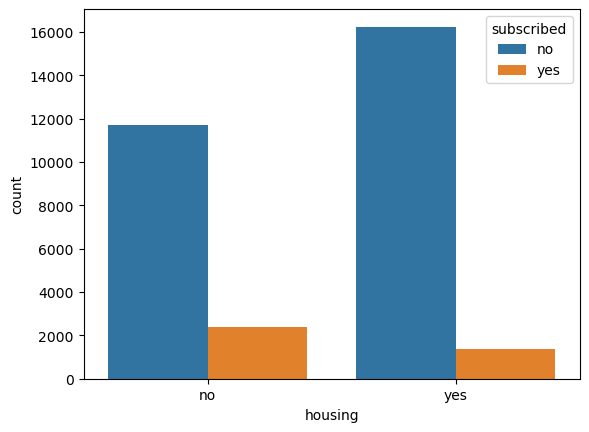

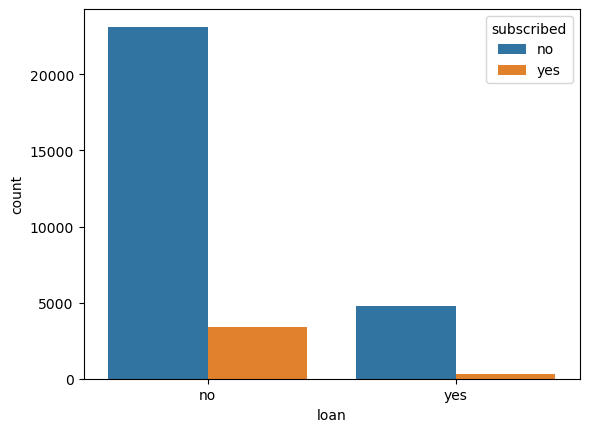

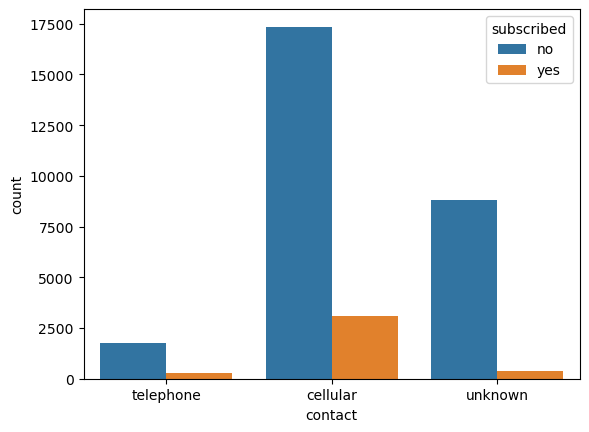

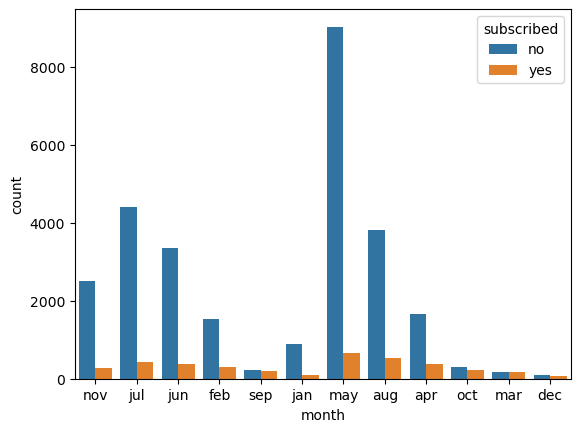

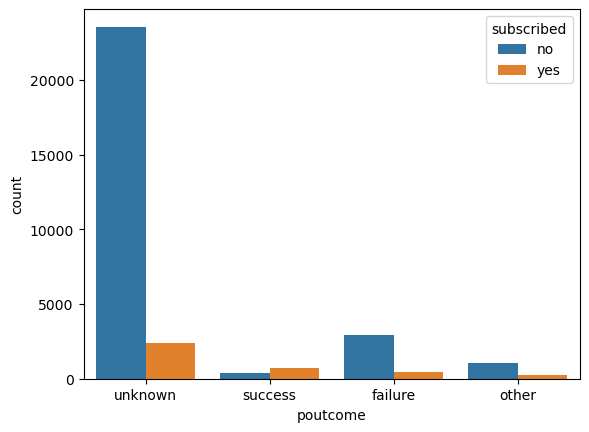

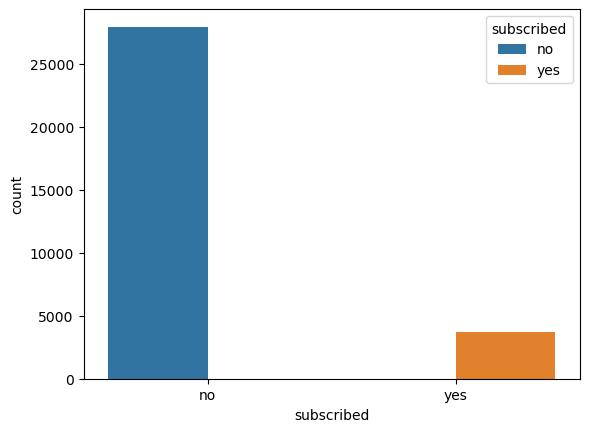

In [69]:
import seaborn as sns 
for column in cat_variable:
    sns.countplot(x=column,hue='subscribed',data=df)
    plt.show()

In [70]:
cat_variable

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [71]:

df.groupby(['subscribed','marital'])['subscribed'].count()

subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
            married      1919
            single       1351
Name: subscribed, dtype: int64

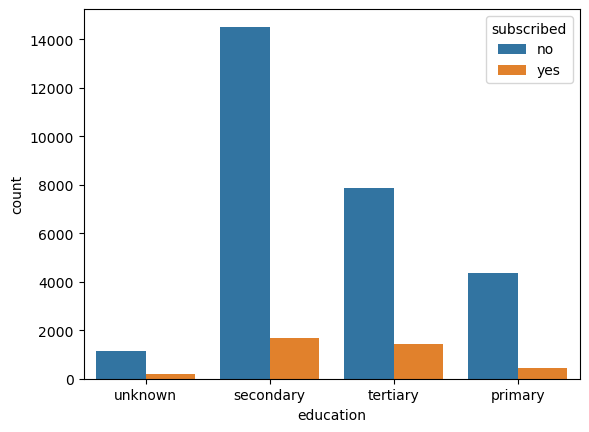

In [72]:
sns.countplot(x="education",hue='subscribed',data=df)
plt.show()

In [73]:
pd.crosstab(df.subscribed,df.marital,margins=True).style.background_gradient(cmap='summer_r')

In [74]:
pd.crosstab(df.subscribed,df.job).style.background_gradient(cmap='summer_r')

<Axes: xlabel='poutcome', ylabel='subscribed'>

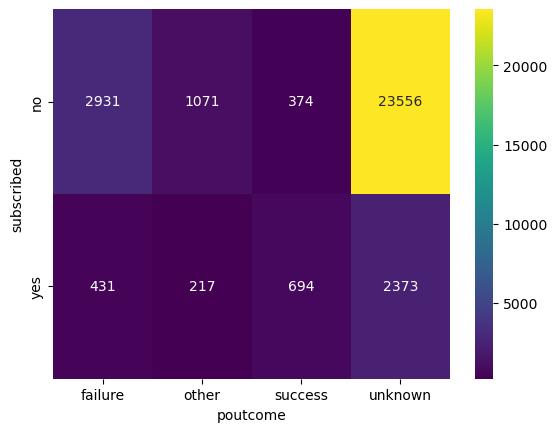

In [75]:
cd=pd.crosstab(df.subscribed,df.poutcome)#.style.background_gradient(cmap='summer_r')

sns.heatmap(cd, annot=True, cmap='viridis', fmt='d')


In [76]:
for x in cat_variable:
    print(x)
    
    display(pd.crosstab(df.subscribed,df[x],margins=True).style.background_gradient(cmap='viridis'))
    

job


marital


education


default


housing


loan


contact


month


poutcome


subscribed


In [77]:
from ydata_profiling import ProfileReport


In [78]:
profile = ProfileReport(df, title="Profiling Report")


In [79]:
profile 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
del num_variable[0]

In [81]:
corr=df[(num_variable)].corr()

<Axes: >

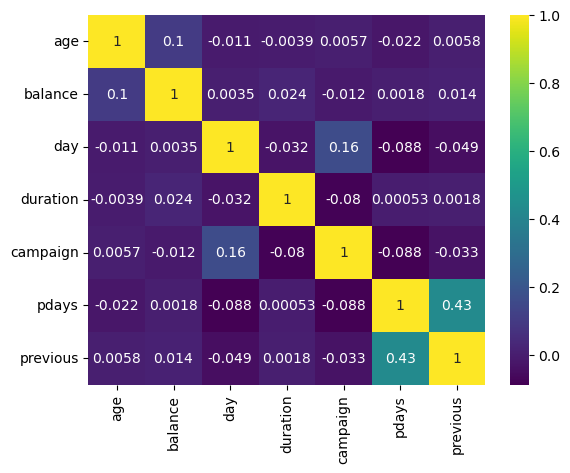

In [82]:
sns.heatmap(corr,annot=True,cmap='viridis')

In [83]:
num_variable

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

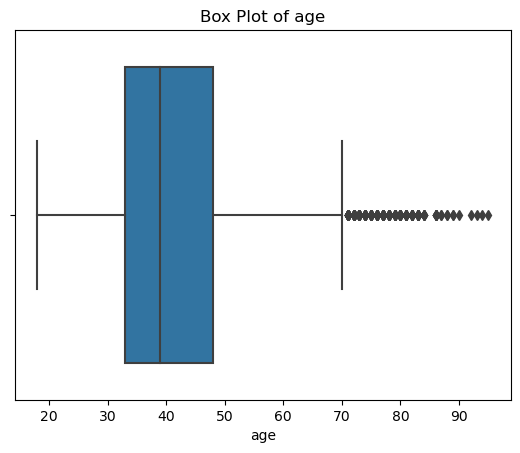

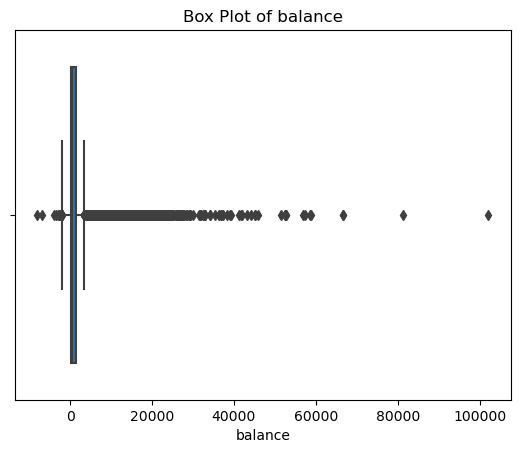

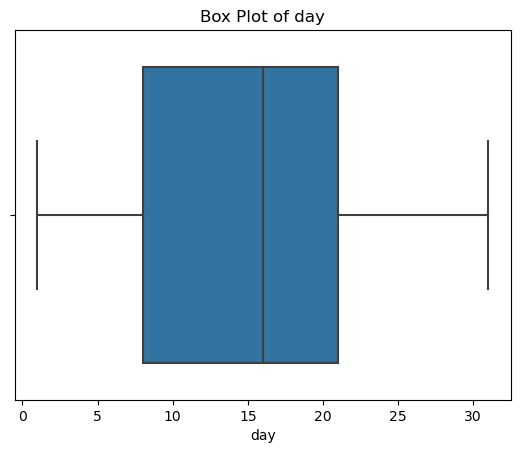

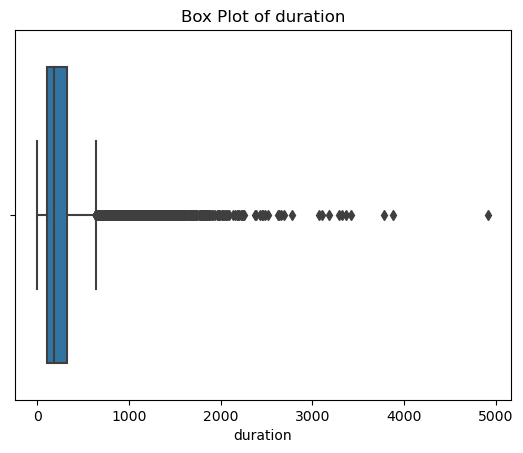

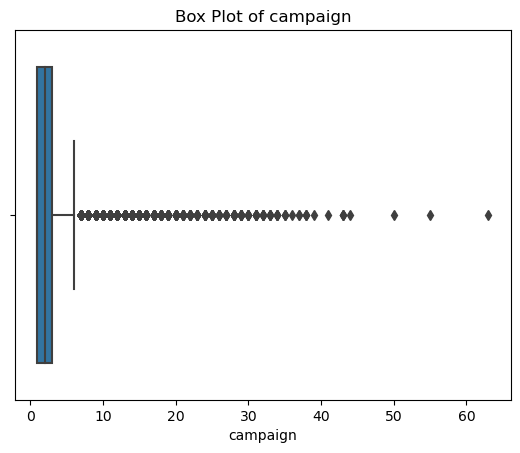

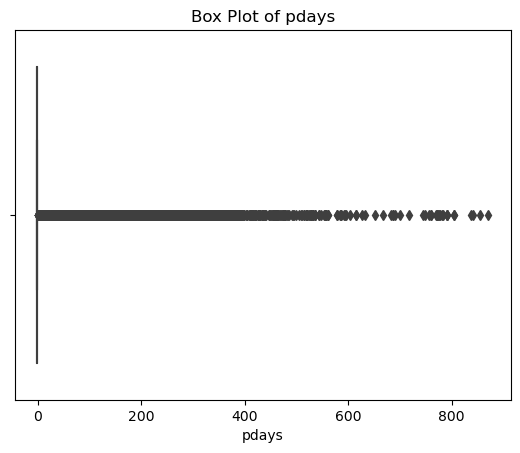

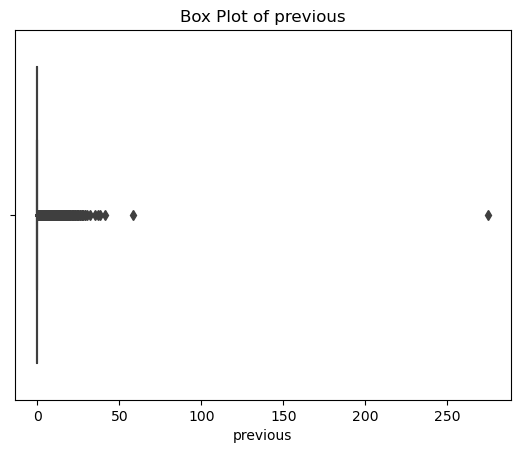

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
for x in num_variable:
    
    sns.boxplot(x=df[x])
    plt.title("Box Plot of {}".format(x))
    plt.show()


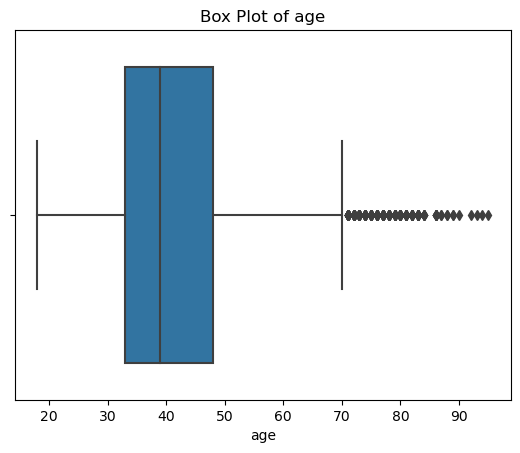

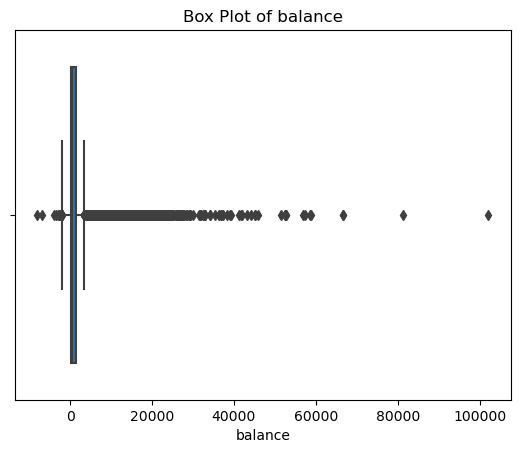

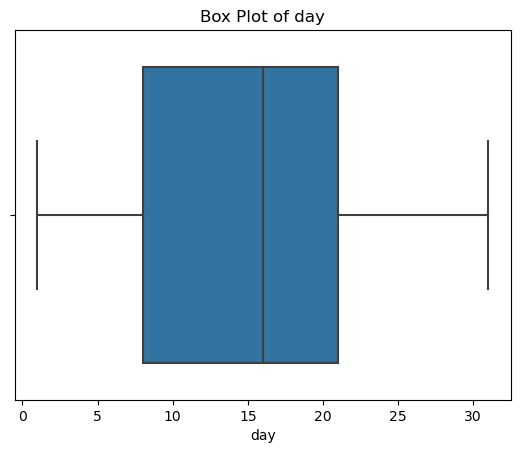

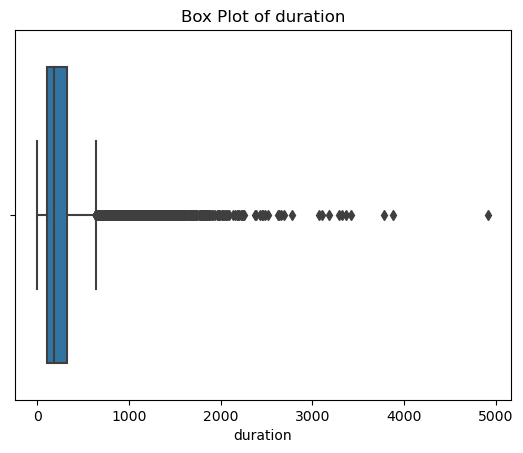

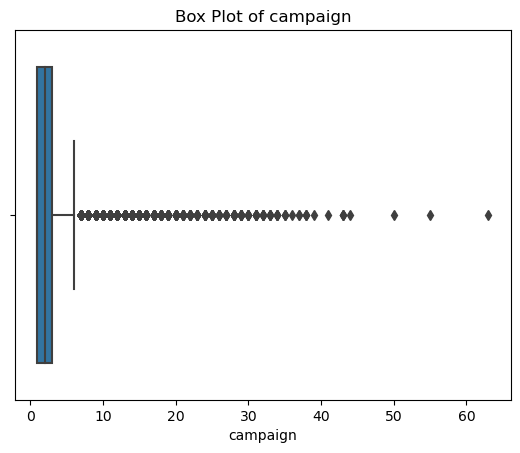

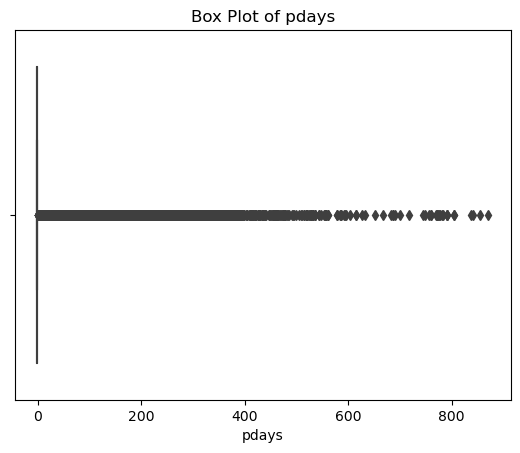

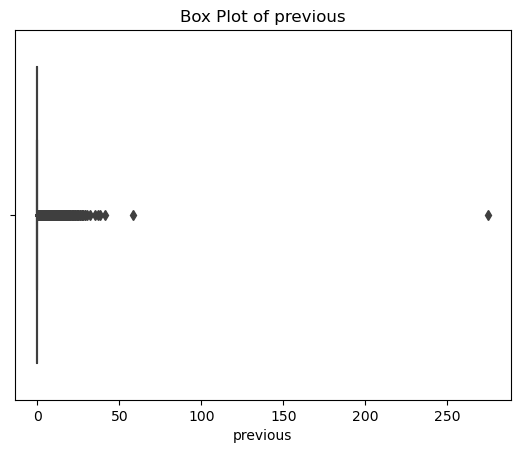

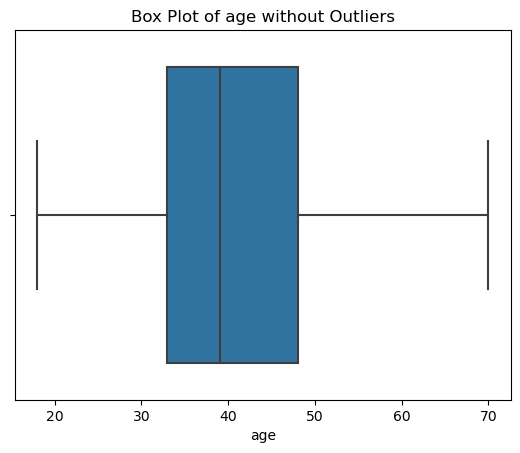

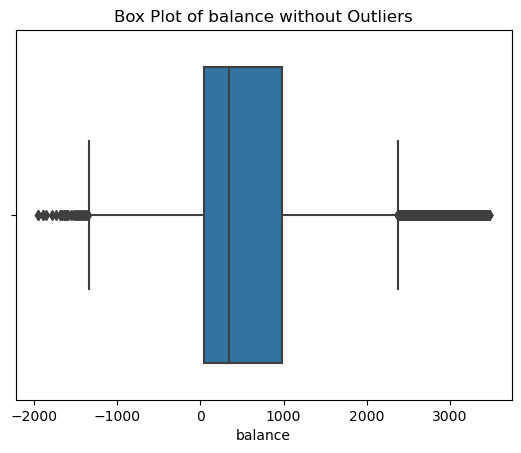

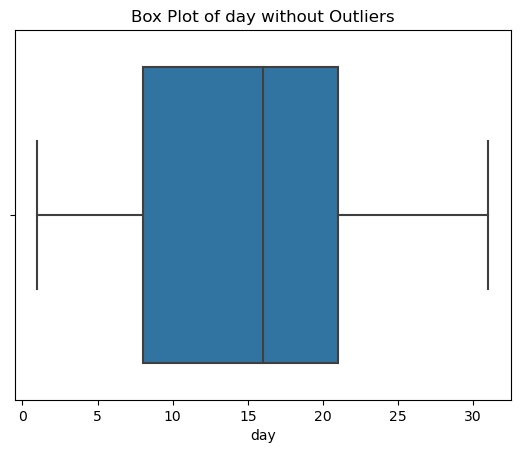

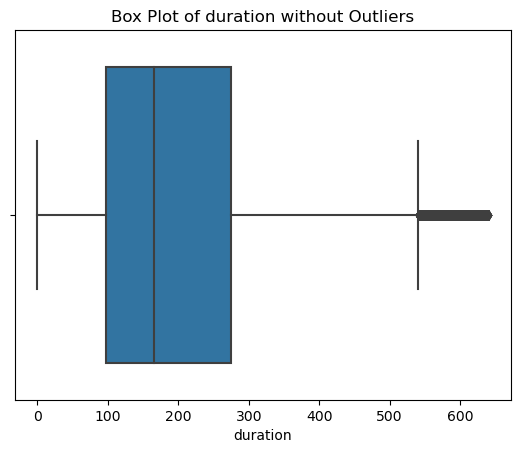

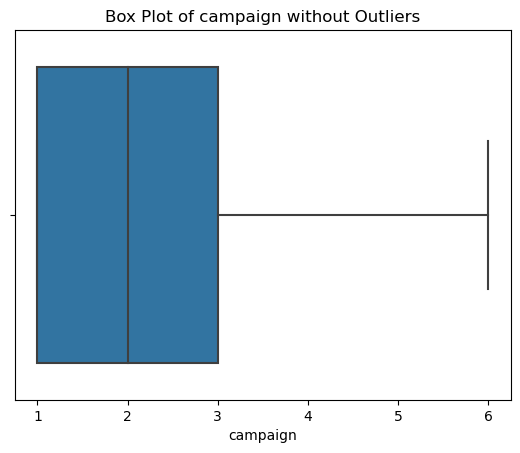

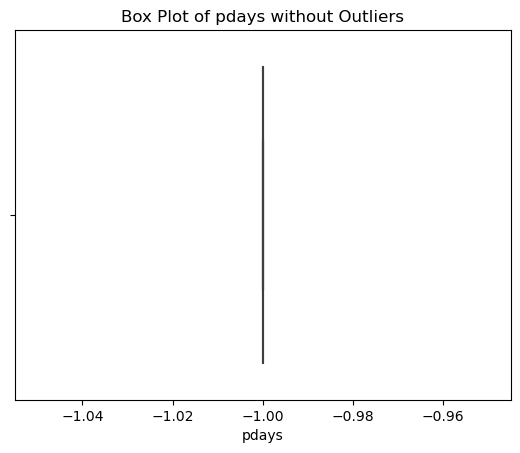

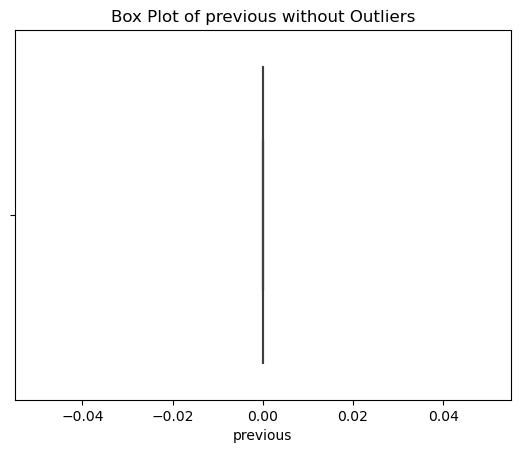

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers_iqr(data, variable, multiplier=1.5):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

df_no_outliers = pd.DataFrame()

for x in num_variable:
    sns.boxplot(x=df[x])
    plt.title("Box Plot of {}".format(x))
    plt.show()

    df_no_outliers[x] = remove_outliers_iqr(df, x)[x]

for column in df_no_outliers.columns:
    sns.boxplot(x=df_no_outliers[column])
    plt.title("Box Plot of {} without Outliers".format(column))
    plt.show()


In [86]:
df_copy = df.copy()


In [87]:
df_copy2=df.copy()

In [88]:

for x in num_variable:
    outlier_rows = ~((df_copy[x] >= df_copy[x].quantile(0.25) - 1.5 * (df_copy[x].quantile(0.75) - df_copy[x].quantile(0.25))) &
                     (df_copy[x] <= df_copy[x].quantile(0.75) + 1.5 * (df_copy[x].quantile(0.75) - df_copy[x].quantile(0.25))))

    df_copy = df_copy[~outlier_rows]



In [89]:
for x in num_variable:
    outlier_cell = ~((df_copy2[x] >= df_copy2[x].quantile(0.25) - 1.5 * (df_copy2[x].quantile(0.75) - df_copy2[x].quantile(0.25))) &
                     (df_copy2[x] <= df_copy2[x].quantile(0.75) + 1.5 * (df_copy2[x].quantile(0.75) - df_copy2[x].quantile(0.25))))

    df_copy2.loc[outlier_cell, x]= float('nan')
    

In [90]:
df_copy2.isnull().sum()

age            349
job              0
marital          0
education        0
default          0
balance       3299
housing          0
loan             0
contact          0
day              0
month            0
duration      2288
campaign      2126
pdays         5723
previous      5723
poutcome         0
subscribed       0
dtype: int64

In [91]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


In [124]:
cat_variables=cat_variable
cat_variables=cat_variables[:-1]
cat_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [103]:
x=df_copy.iloc[:,:-1]
y=df_copy["subscribed"]

In [128]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
preprocessing=ColumnTransformer(
transformers=[('num',StandardScaler(),num_variable),
           ('cat',OneHotEncoder(),cat_variables)])
trasformed_data=preprocessing.fit_transform(x)
cat_feature_names = list(preprocessing.named_transformers_['cat'].get_feature_names_out(cat_variables))
transformed_df=pd.DataFrame(trasformed_data,columns=num_variable +cat_feature_names)

In [129]:
transformed_df

age   balance       day  duration  campaign  pdays  previous  \
0      1.583823  1.610573  0.382214 -1.164683 -0.140898    0.0       0.0   
1     -0.952310 -0.727124  0.501278 -0.822500 -0.140898    0.0       0.0   
2     -1.358092  0.348459  0.263149  0.262292 -0.885809    0.0       0.0   
3     -0.952310 -0.586620 -1.403752  1.281560 -0.885809    0.0       0.0   
4     -0.749420 -0.730758 -1.641881 -0.640488  0.604012    0.0       0.0   
...         ...       ...       ...       ...       ...    ...       ...   
19715  0.265034  2.864209  0.501278 -1.266610  1.348922    0.0       0.0   
19716 -0.343638  0.854758 -1.165624  1.732950 -0.140898    0.0       0.0   
19717 -1.155201 -0.730758 -0.451237 -0.640488 -0.140898    0.0       0.0   
19718  1.279487 -0.270486 -1.284688  1.703828 -0.140898    0.0       0.0   
19719 -0.850865 -0.352850 -1.046559 -1.215647  0.604012    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_feb  \
0             1.0              0.0               0.0  ...        0.0   
1             0.0              0.0               0.0  ...        0.0   
2             0.0              0.0               0.0  ...        0.0   
3             0.0              0.0               0.0  ...        1.0   
4             0.0              0.0               0.0  ...        1.0   
...           ...              ...               ...  ...        ...   
19715         0.0              0.0               0.0  ...        0.0   
19716         0.0              0.0               0.0  ...        0.0   
19717         0.0              0.0               0.0  ...        0.0   
19718         0.0              0.0               0.0  ...        0.0   
19719         0.0              0.0               0.0  ...        0.0   

       month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0            0.0        0.0        0.0        0.0        0.0        1.0   
1            0.0        1.0        0.0        0.0        0.0        0.0   
2            0.0        1.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
19715        0.0        0.0        1.0        0.0        0.0        0.0   
19716        0.0        0.0        1.0        0.0        0.0        0.0   
19717        0.0        0.0        0.0        0.0        1.0        0.0   
19718        0.0        0.0        1.0        0.0        0.0        0.0   
19719        0.0        0.0        0.0        0.0        0.0        0.0   

       month_oct  month_sep  poutcome_unknown  
0            0.0        0.0               1.0  
1            0.0        0.0               1.0  
2            0.0        0.0               1.0  
3            0.0        0.0               1.0  
4            0.0        0.0               1.0  
...          ...        ...               ...  
19715        0.0        0.0               1.0  
19716        0.0        0.0               1.0  
19717        0.0        0.0               1.0  
19718        0.0        0.0               1.0  
19719        0.0        0.0               1.0  

[19720 rows x 48 columns]

In [130]:
y

0         no
1         no
2         no
4         no
5         no
        ... 
31640     no
31641     no
31642     no
31643    yes
31644     no
Name: subscribed, Length: 19720, dtype: object

In [136]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
y=LabelEncoder.fit_transform(y)

In [139]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_df,y,test_size=0.2,random_state=55)

Model: Logistic Regression
Accuracy: 0.9457403651115619
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3726
           1       0.53      0.15      0.23       218

    accuracy                           0.95      3944
   macro avg       0.74      0.57      0.60      3944
weighted avg       0.93      0.95      0.93      3944

-------------------------------
Feature Importances:
                 Feature  Coefficient
42            month_mar     2.234088
45            month_oct     1.339935
3              duration     0.996191
32     contact_cellular     0.823523
37            month_dec     0.776229
33    contact_telephone     0.764251
41            month_jun     0.750020
46            month_sep     0.749304
15          job_student     0.696545
28           housing_no     0.484541
12          job_retired     0.418346
35            month_apr     0.403439
30              loan_no     0.272075
7            job_admi

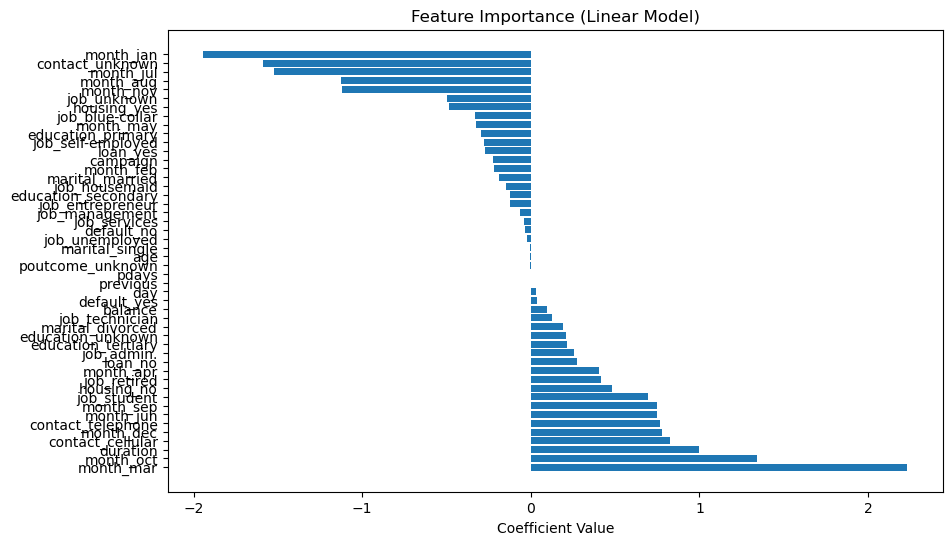

Model: Decision Tree
Accuracy: 0.9282454361054767
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3726
           1       0.34      0.33      0.34       218

    accuracy                           0.93      3944
   macro avg       0.65      0.65      0.65      3944
weighted avg       0.93      0.93      0.93      3944

-------------------------------
Feature Importances:
                 Feature  Importance
3              duration    0.232813
1               balance    0.130316
2                   day    0.110106
0                   age    0.097925
4              campaign    0.031573
42            month_mar    0.027173
34      contact_unknown    0.025596
41            month_jun    0.023502
29          housing_yes    0.021248
43            month_may    0.020990
35            month_apr    0.020438
45            month_oct    0.018490
24   education_tertiary    0.017737
32     contact_cellular    0.014236
38   

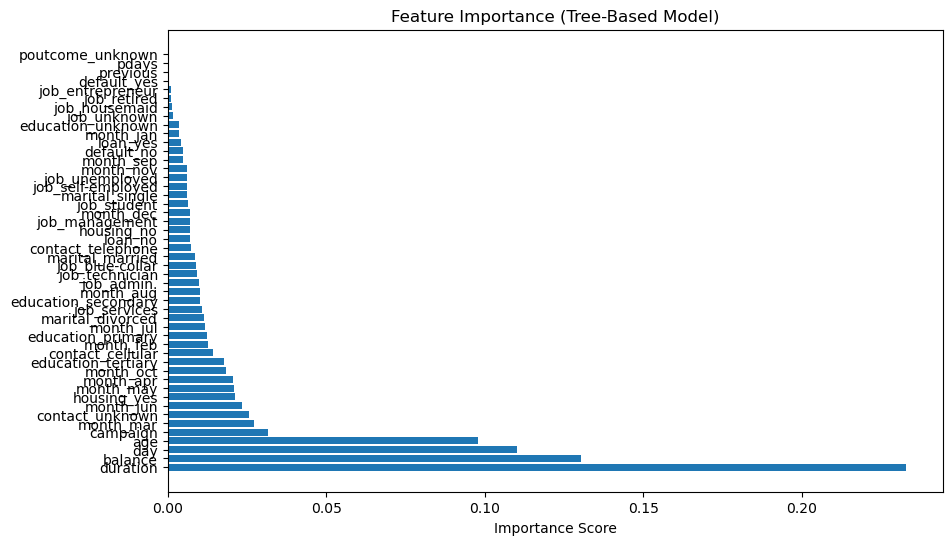

Model: Random Forest
Accuracy: 0.9482758620689655
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3726
           1       0.71      0.11      0.19       218

    accuracy                           0.95      3944
   macro avg       0.83      0.55      0.58      3944
weighted avg       0.94      0.95      0.93      3944

-------------------------------
Feature Importances:
                 Feature  Importance
3              duration    0.200835
0                   age    0.121009
1               balance    0.119184
2                   day    0.109278
4              campaign    0.045000
42            month_mar    0.025180
35            month_apr    0.023273
41            month_jun    0.019345
45            month_oct    0.015935
23  education_secondary    0.014740
24   education_tertiary    0.014524
32     contact_cellular    0.014184
11       job_management    0.014150
28           housing_no    0.014041
29   

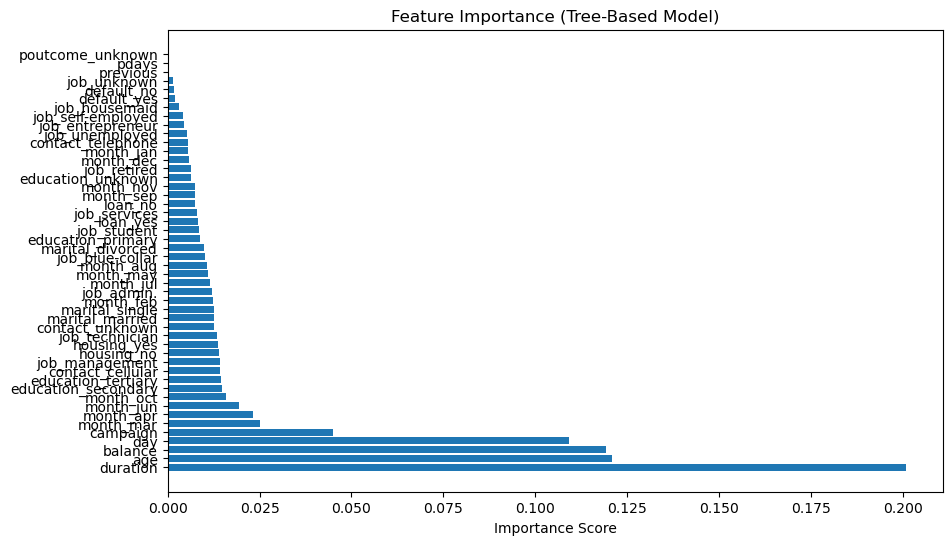

Model: Support Vector Machine
Accuracy: 0.9467545638945233
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3726
           1       0.83      0.05      0.09       218

    accuracy                           0.95      3944
   macro avg       0.89      0.52      0.53      3944
weighted avg       0.94      0.95      0.92      3944

-------------------------------


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
trained_models = {}


models = [
    ('Logistic Regression', LogisticRegression(max_iter=500)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for model_name, model in models:
    print(f"Model: {model_name}")
    model.fit(x_train, y_train)
    trained_models[model_name] = model

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    print("-------------------------------") 
     # Print feature importances for applicable models
    if hasattr(model, 'coef_'):  # Check if the model has coefficients (for linear models)
        feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model.coef_[0]})
        feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
        print("Feature Importances:\n", feature_importance)
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
        plt.xlabel('Coefficient Value')
        plt.title('Feature Importance (Linear Model)')
        plt.show()
    
    elif hasattr(model, 'feature_importances_'):  # Check if the model has feature importances (for tree-based models)
        feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importances:\n", feature_importance)
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance['Feature'], feature_importance['Importance'])
        plt.xlabel('Importance Score')
        plt.title('Feature Importance (Tree-Based Model)')
        plt.show()
    


In [154]:
from sklearn.model_selection import cross_val_score
for model_name, model in models:
    scores=cross_val_score(model,transformed_df,y,cv=5)
    score=np.mean(scores)
    print(f"Model: {model_name} score {score}")


Model: Logistic Regression score 0.9459432048681542
Model: Decision Tree score 0.9229716024340769
Model: Random Forest score 0.9457910750507098
Model: Support Vector Machine score 0.9460953346855984


In [163]:
from sklearn.model_selection import GridSearchCV
dmodel=RandomForestClassifier()
param_grid={'n_estimators':[10,20,50,100,200],
           'max_depth':['none',10,20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
}
grid_cv=GridSearchCV(dmodel,param_grid=param_grid,cv=5,scoring='accuracy')
grid_cv.fit(transformed_df,y)
print("best parameters ",grid_cv.best_params_)
print("best score ",grid_cv.best_score_)


C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yaris\anaconda3\Lib\site-packag

best parameters  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
best score  0.9471602434077079


In [166]:
fmodel=RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=5,min_samples_leaf=2,class_weight='balanced', random_state=42)
fmodel.fit(x_train,y_train)
y_pred = fmodel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
    

Accuracy: 0.9399087221095335
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3726
           1       0.45      0.38      0.41       218

    accuracy                           0.94      3944
   macro avg       0.71      0.67      0.69      3944
weighted avg       0.94      0.94      0.94      3944



In [167]:
fmodel=RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=5,min_samples_leaf=2)
fmodel.fit(x_train,y_train)
y_pred = fmodel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
    

Accuracy: 0.9475152129817445
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3726
           1       0.76      0.07      0.13       218

    accuracy                           0.95      3944
   macro avg       0.86      0.54      0.55      3944
weighted avg       0.94      0.95      0.93      3944



In [178]:
from sklearn.svm import OneClassSVM
# Assuming X_train contains instances of the majority class
model = OneClassSVM(kernel='rbf', nu=0.5)  # You may need to adjust hyperparameters like 'nu'
model.fit(x_train)
# Assuming X_test contains instances to be scored
scores = model.decision_function(x_test)
threshold = 0.8  # You need to choose an appropriate threshold
predictions = (scores < threshold).astype(int)


In [179]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains true labels for the test set
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Classification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.51      0.67      3726
           1       0.07      0.64      0.13       218

    accuracy                           0.52      3944
   macro avg       0.52      0.58      0.40      3944
weighted avg       0.91      0.52      0.64      3944

